In [1]:
import numpy as np
from numpy import array
from time import time

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
from keras.callbacks import TensorBoard

import matplotlib.pyplot as plt





Using TensorFlow backend.


## Load Data


In [2]:
train_data = np.load("MNIST/trainImages.npy")
test_data = np.load("MNIST/testImages.npy")

y_train = np.load("MNIST/trainLabels.npy")
y_test = np.load("MNIST/testLabels.npy")



## Pre-process data
1. Standardize dataset
2. Ensure shape is compatible with required format for tensorflow:  (batch, height, width, channels)




Size of training set:  (60000, 28, 28, 1)
Some examples of the training set:


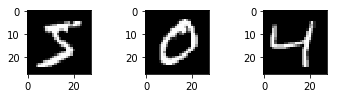

In [3]:

# Normalize
x_train = train_data[:,0:]/255
x_test= test_data[:,0:]/255

# Ensure Correct shape
image_rows = 28
image_cols = 28
image_shape = (image_rows,image_cols,1)
x_train = x_train.reshape(train_data.shape[0],*image_shape)
x_test = x_test.reshape(test_data.shape[0],*image_shape)


print("Size of training set: ",x_train.shape)


print("Some examples of the training set:")

for i in range(0, 3):
    plt.subplot(330 + (i+1))
    plt.imshow(x_train[i].reshape(28,28), cmap=plt.get_cmap('gray'))
        
        

        
    

## Define fully connected CNN

### The three things I need to define in the CNN are:

1. Convolution
2. Activation
3. Pooling

In the first layer, 32 filters of (5, 5) size  with ReLU activation function is chosen to reduce training time and avoid  vanishing gradients. To reduce overfitting and training time, a MaxPooling layer is used to down-sample the input
To feed this as input to the fully connected layers, they are flattened.

To further improve test accuracy and avoid overfitting, Dropout is added. In this model, 10% random neurons will be disabled.

To now compute the probability distribution of the 10 classes, a dense layer with units equal to number of classes is added followed by softmax activation layer. The final class for each input will be the one with the highest probability in the softmax layer. 



In [4]:
# Define the Sequential CNN
cnn_model = Sequential([
    Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)),
    Conv2D(32, (5,5), activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(32, (3,3), activation='relu'),
    Flatten(), # flatten out the layers
    Dense(units=256, activation='relu'),
    Dropout(0.1),
    Dense(units=10),
    
    Activation('softmax')
])

# Initialize and compile:

cnn_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Create a Tensorboard instance
#tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

cnn_model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
__________

## Train model

Batch Size: 64
Epochs: 50

Validation Size: 20% 

In [5]:

# Training
batch_size = 64
history = cnn_model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=100,
    verbose=1,
    #callbacks=[tensorboard]
)


Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 7s 154us/step - loss: 0.1455 - acc: 0.9553 - val_loss: 0.0685 - val_acc: 0.9785
Epoch 2/100
48000/48000 [==============================] - 5s 111us/step - loss: 0.0434 - acc: 0.9866 - val_loss: 0.0379 - val_acc: 0.9888
Epoch 3/100
48000/48000 [==============================] - 5s 107us/step - loss: 0.0294 - acc: 0.9910 - val_loss: 0.0382 - val_acc: 0.9892
Epoch 4/100
48000/48000 [==============================] - 5s 111us/step - loss: 0.0245 - acc: 0.9923 - val_loss: 0.0286 - val_acc: 0.9915
Epoch 5/100
48000/48000 [==============================] - 5s 111us/step - loss: 0.0191 - acc: 0.9943 - val_loss: 0.0361 - val_acc: 0.9907
Epoch 6/100
48000/48000 [==============================] - 5s 108us/step - loss: 0.0155 - acc: 0.9954 - val_loss: 0.0367 - val_acc: 0.9898
Epoch 7/100
48000/48000 [==============================] - 5s 107us/step - loss: 0.0142 - acc: 0.9959 - val_loss: 0.

48000/48000 [==============================] - 5s 107us/step - loss: 0.0040 - acc: 0.9996 - val_loss: 0.1159 - val_acc: 0.9916
Epoch 60/100
48000/48000 [==============================] - 5s 108us/step - loss: 0.0030 - acc: 0.9997 - val_loss: 0.1059 - val_acc: 0.9919
Epoch 61/100
48000/48000 [==============================] - 4s 91us/step - loss: 0.0025 - acc: 0.9997 - val_loss: 0.1150 - val_acc: 0.9920
Epoch 62/100
48000/48000 [==============================] - 5s 105us/step - loss: 0.0012 - acc: 0.9999 - val_loss: 0.1030 - val_acc: 0.9928
Epoch 63/100
48000/48000 [==============================] - 5s 99us/step - loss: 0.0025 - acc: 0.9997 - val_loss: 0.1159 - val_acc: 0.9918
Epoch 64/100
48000/48000 [==============================] - 5s 105us/step - loss: 0.0057 - acc: 0.9995 - val_loss: 0.1182 - val_acc: 0.9912
Epoch 65/100
48000/48000 [==============================] - 5s 111us/step - loss: 0.0041 - acc: 0.9996 - val_loss: 0.1341 - val_acc: 0.9898
Epoch 66/100
48000/48000 [=========

## Test Accuracy

In [6]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))


Test Loss : 0.1016
Test Accuracy : 0.9931


## Visualizing the performance of the networks

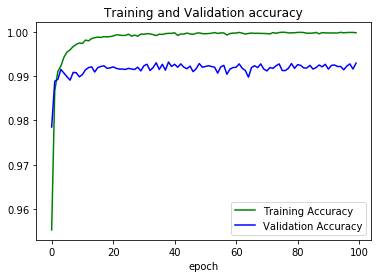

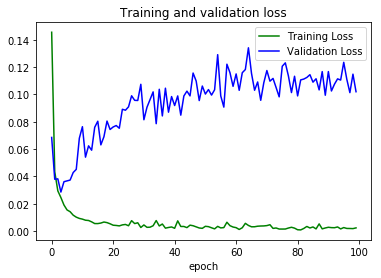

In [7]:

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'g', label='Training Accuracy')

plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('epoch')

plt.legend()
plt.show()


Validation accuracy is a lot lower than the training accuracy, reducing the number of epochs should be helpful


In [8]:
# Define the Sequential CNN
cnn_model2 = Sequential([
    Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)),
    Conv2D(32, (5,5), activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(32, (3,3), activation='relu'),
    Flatten(), # flatten out the layers
    Dense(units=256, activation='relu'),
    Dropout(0.1),
    Dense(units=10),
    
    Activation('softmax')
])

# Initialize and compile:

cnn_model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Create a Tensorboard instance
#tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

cnn_model2.summary()

# Training
batch_size = 64
history = cnn_model2.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=5,
    verbose=1,
    #callbacks=[tensorboard]
)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

## View final accuracy


In [9]:
score = cnn_model2.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))


Test Loss : 0.0402
Test Accuracy : 0.9887


## Visualizing performance

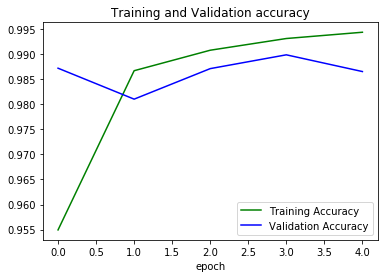

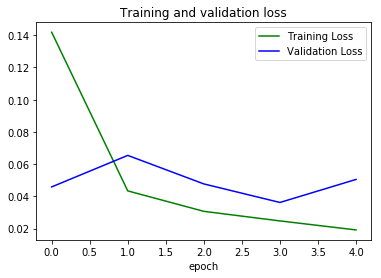

In [10]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'g', label='Training Accuracy')

plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('epoch')

plt.legend()
plt.show()

## The weight and biases 

In [11]:
weights = cnn_model2.layers[0].get_weights()[0]
biases = cnn_model2.layers[0].get_weights()[1]
print("Biases: ",biases)

print("Weights: ",weights)







Biases:  [ 0.01391682 -0.06766279 -0.08425654 -0.03588153 -0.01599384 -0.02373236
 -0.01999287 -0.11365086 -0.01572378 -0.0474993  -0.05611112 -0.11088567
  0.00744221  0.0471003  -0.04547524 -0.00378237 -0.0762144  -0.03097933
  0.00297311 -0.00285952 -0.00583226 -0.00384424 -0.05796425 -0.04945184
 -0.00449542 -0.03927846 -0.02878164  0.00568616 -0.05505557 -0.08780394
 -0.00922501 -0.06942464]
Weights:  [[[[-1.30662441e-01 -6.46523684e-02  1.17354594e-01 -2.66272039e-03
     1.84237361e-02 -6.25096485e-02 -3.09615545e-02  9.89549831e-02
    -4.41678129e-02 -5.02521954e-02  3.37709859e-02  1.49381503e-01
     4.31527868e-02 -5.85989319e-02 -6.49786294e-02  1.82338315e-03
     3.83072123e-02  7.74589553e-02 -4.48100194e-02  6.92128763e-02
     1.82741918e-02  6.74837455e-02 -7.09540620e-02  3.45151946e-02
     5.56102283e-02 -8.37882087e-02  2.26051547e-02 -7.57940784e-02
    -8.64461064e-02 -2.98684575e-02  9.83051434e-02  6.65886775e-02]]

  [[ 1.16823642e-02  6.87135756e-02  4.4173

## Some incorrect classifications: 



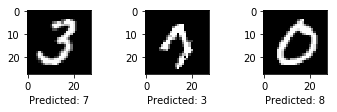

In [12]:
predictions = cnn_model2.predict_classes(x_test)

test_labels = [np.where(r==1)[0][0] for r in y_test]
flag = 0
i = 0

while flag<3 and i<len(test_labels):
    
    if(predictions[i]!=test_labels[i]):
        plt.subplot(330 + (flag+1))
        plt.imshow(x_train[i].reshape(28,28), cmap=plt.get_cmap('gray'))
        plt.xlabel("Predicted: "+str(predictions[i]))
        flag+=1
    i+=1

## Insight into classifier:
The classifier performs well across all classes.


In [13]:
num_classes = 10
correct = np.nonzero(predictions==test_labels)[0]
incorrect = np.nonzero(predictions!=test_labels)[0]
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(test_labels, predictions, target_names=target_names))




              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99       980
     Class 1       0.99      1.00      0.99      1135
     Class 2       1.00      0.99      0.99      1032
     Class 3       0.95      1.00      0.97      1010
     Class 4       0.99      0.99      0.99       982
     Class 5       0.99      0.99      0.99       892
     Class 6       0.99      0.99      0.99       958
     Class 7       0.99      0.99      0.99      1028
     Class 8       1.00      0.99      0.99       974
     Class 9       1.00      0.96      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

